In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

# Set the directory path where the images are stored
img_path = "C:\\Users\\malik\\Downloads\\datasetsuper\\"
superhero_label = ['superman','spiderman','batman']


img_list = []
label_list = []
for label in superhero_label:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})

# Create a dataframe for mapping label
# Encode

X = []

for img in df['img']:
    img = cv2.imread(str(img))
    # img = augment_function(img)
    img = cv2.resize(img, (224, 224))
    X.append(img)

df_labels = {
    'superman' : 0,
    'batman' : 1,
    'spiderman' : 2
}

df['encode_label'] = df['label'].map(df_labels)

y = df['encode_label']

In [2]:
def load_dataset():
  trainX, testX, trainY, testY = train_test_split(
    X, y, test_size=0.3, random_state=42)

  trainX = np.array(trainX)
  testX = np.array(testX)

  trainX = trainX.reshape((trainX.shape[0], 224, 224, 3))

  testX = testX.reshape((testX.shape[0], 224, 224, 3))
  
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 256)     

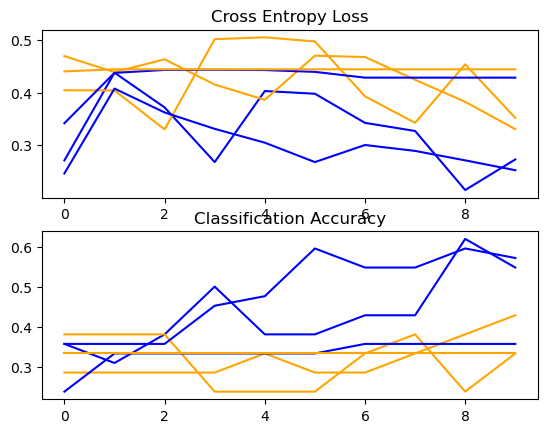

Accuracy: mean=36.508 std=4.490, n=3


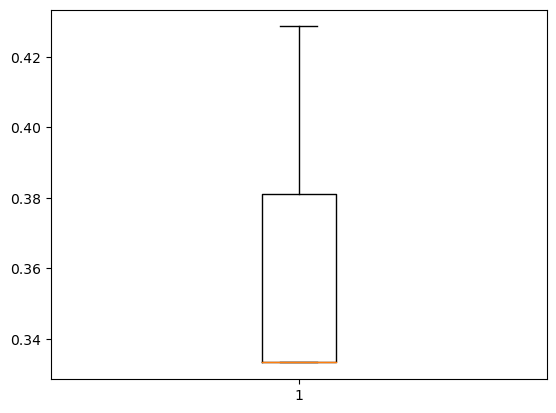

In [5]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
#from keras.optimizers import SGD
import tensorflow as tf

# scale normalization
def prep_pixels(train, test):
  train = np.array(train)
  test = np.array(test)
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm


# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))  # Replace 'num_classes' with the number of super heros
    opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum =0.9)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    model.summary()
    #plot_graph
    return model



# evaluate a model using k-fold cross-validation
def train_and_evaluate_model(dataX, dataY, n_folds=3):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories


# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    pyplot.subplot(2, 1, 1)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(2, 1, 2)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  pyplot.show()


# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  # box and whisker plots of results
  pyplot.boxplot(scores)
  pyplot.show()



# run the test harness for evaluating a model
def run_test_harness():
  
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, histories = train_and_evaluate_model(trainX, trainY)
  
  # learning curves
  summarize_diagnostics(histories)

  # summarize estimated performance
  summarize_performance(scores)
 
# entry point, run the test harness
run_test_harness()
